UFRN/PPgEEC

Disciplina: Processos Estocásticos (prof Pablo Javier Alsina)

#Trabalho: Atividade de simulação de distribuição uniforme de pontos em esferas e elipsóides


Implementar algoritmo para gerar pontos uniformemente distribuídos na superfície de um elipsóide em 3 dimensões, com razões entre os eixos: (a) 9:4:1 e (b) 10:9:8. Em cada um dos elipsóides a e b, realizar cinco experimentos aleatórios, com 100, 500, 1000, 5000 e 10000 amostras.


Preparar relatório descrevendo os algorítmos utilizados e resultados obtidos.

In [0]:

from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt
import numpy as np
import math


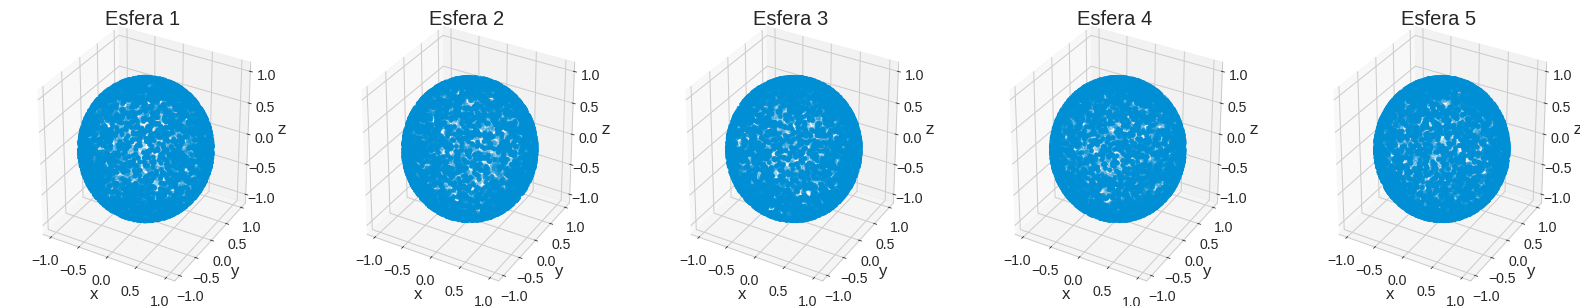

In [0]:

numExperim=5000
plt.style.use('seaborn-whitegrid') #estilo de gráficos similar ao R
fig = plt.figure(figsize=[25.0,5.0])

for j in range(5):

    ax = fig.add_subplot(1,5,(j+1),projection='3d')
    X=np.zeros(numExperim)
    Y=np.zeros(numExperim)
    Z=np.zeros(numExperim)

    i=0
    while i<numExperim:
        x = np.random.uniform(-1.0,1.0)
        y = np.random.uniform(-1.0,1.0)
        z = x**2 + y**2
        if z<1:
            X[i]=2*x*(1-z)**(0.5)
            Y[i]=2*y*(1-z)**(0.5)
            Z[i]=1-2*z

            i=i+1
    
    ax.scatter(X,Y,Z)

    ax.set_zlabel('z')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    #ax.view_init(1,1)
    #plt.axis([-10.,10.,-10.,10.])
    plt.title('Esfera {}'.format(j+1))

#depois de todos os add_subplot...
plt.show()


Para o caso da geração de pontos aleatórios num elipsóide, o algoritmo adotado é aquele sugerido por X. Rong Li, um pioneiro da distribuição aleatória uniforme de pontos nesse tipo de estrutura espacial.

O método consiste em:

1) gerar $x_1 \equiv U(-r\lambda_{max}, r\lambda_{max})$, $x_2 \equiv U(-r\lambda_{max}, r\lambda_{max})$, $x_3 \equiv U(-r\lambda_{max}, r\lambda_{max})$, ...

2) Seja $x = [x_1, x_2, x_3, ...]'$ e y o vetor aleatório desejado

se $x'x \leq r$ então $y = x$

senão, se $x'S^{-1}x \leq r$ então $y = x$



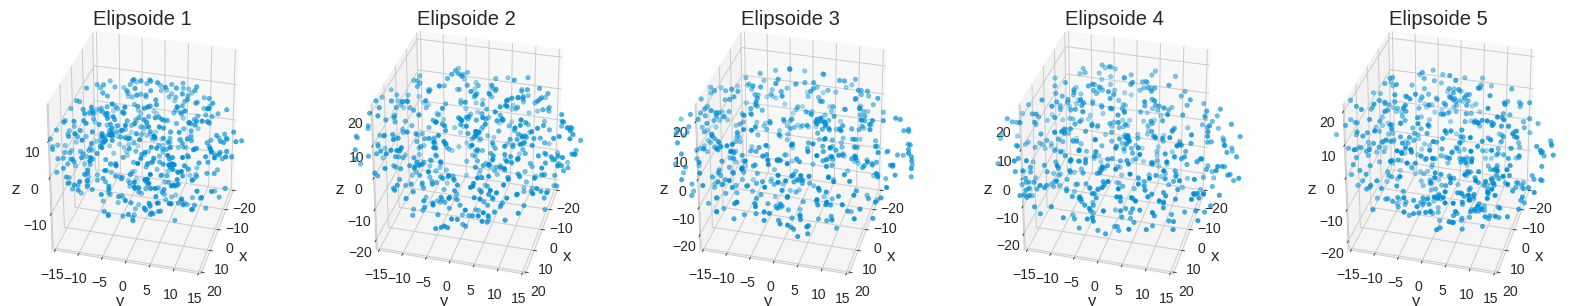

In [0]:

numExperim=500

#plt.style.use('ggplot') #estilo de gráficos similar ao R
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=[25.0,5.0])

for j in range(5):

    ax = fig.add_subplot(1,5,(j+1),projection='3d')
    y = np.zeros((3,numExperim))
    r = np.random.uniform(0.0,10.0)

    i=0
    while i<numExperim:
        x = np.random.uniform(-r,r,3)

        A = np.dot(x,x.T)
        if A <= r:
            y[0][i] = x[0]
            y[1][i] = x[1]
            y[2][i] = x[2]
            i=i+1
        
    ax.scatter(10.0*y[0],9.0*y[1],8.0*y[2])

    ax.set_zlabel('z')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    #ax.view_init(1,2)
    ax.view_init(azim=15)
    plt.axis([-20.,20.,-15.,15.])
    plt.title('Elipsoide {}'.format(j+1))

#depois de todos os add_subplot...
plt.show()
